# House-Price Prediction 

# DATA SCIENCE ASSIGNMENT-4
## _Abhishek_Sutar

## 4) Data Analytics I
### Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and
### 14 feature variables in this dataset.The objective is to predict the value of prices of the house using the given features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
df=pd.read_csv(r'path')

In [2]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.shape


(506, 14)

In [11]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [12]:
df.dropna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [15]:
df.isnull().sum().sum()

120

In [16]:
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].mean())

In [17]:
df['ZN'] = df['ZN'].fillna(df['ZN'].mean())

In [18]:
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].mean())

In [19]:
df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mean())

In [20]:
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())

In [22]:
df['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].mean())

In [23]:
df.isnull().sum().sum()

0

In [24]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [25]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
correalation=df.corr()

<Axes: >

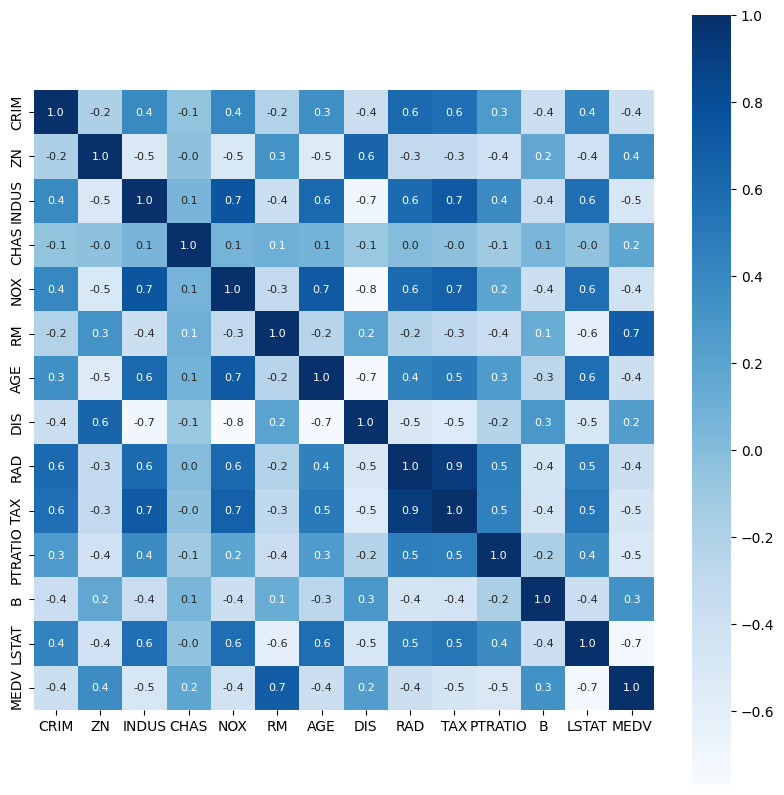

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(correalation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Blues")

In [33]:
x=df.drop(['MEDV'],axis=1)
y=df['MEDV']

In [34]:
x
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [35]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [36]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(x.shape,X_train.shape, X_test.shape)
print(y.shape,y_train.shape, y_test.shape)

(506, 13) (404, 13) (102, 13)
(506,) (404,) (102,)


In [48]:
model=XGBRegressor()

In [52]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [53]:
pred=model.predict(X_train)

In [54]:
pred

array([23.118767 , 21.013851 , 20.104101 , 34.701595 , 13.900053 ,
       13.505482 , 21.995434 , 15.17749  , 10.876621 , 22.698492 ,
       13.802304 ,  5.6086135, 29.813776 , 49.996586 , 34.89296  ,
       20.623835 , 23.376873 , 19.19093  , 32.68609  , 19.619205 ,
       26.98831  ,  8.393243 , 46.00365  , 21.68819  , 27.05935  ,
       19.348013 , 19.295418 , 24.818825 , 22.623287 , 31.690193 ,
       18.554483 ,  8.7028885, 17.400768 , 23.698004 , 13.3178   ,
       10.50433  , 12.731972 , 24.995485 , 19.688604 , 14.897341 ,
       24.219471 , 25.016657 , 14.91027  , 16.994616 , 15.59779  ,
       12.6992   , 24.505219 , 15.016484 , 49.99777  , 17.545815 ,
       21.186632 , 31.996737 , 15.594813 , 22.903502 , 19.319153 ,
       18.737032 , 23.284954 , 37.19379  , 30.098276 , 33.089405 ,
       20.990961 , 49.99099  , 13.398851 ,  4.99892  , 16.498035 ,
        8.419112 , 28.7009   , 19.502474 , 20.59031  , 45.391644 ,
       39.79551  , 33.409286 , 19.812143 , 33.397102 , 25.2654

In [56]:
scor1=metrics.r2_score(y_train,pred)
scor1

0.9999947912270895

In [57]:
scor2=metrics.mean_absolute_error(y_train,pred)
scor2

0.014453256720363575

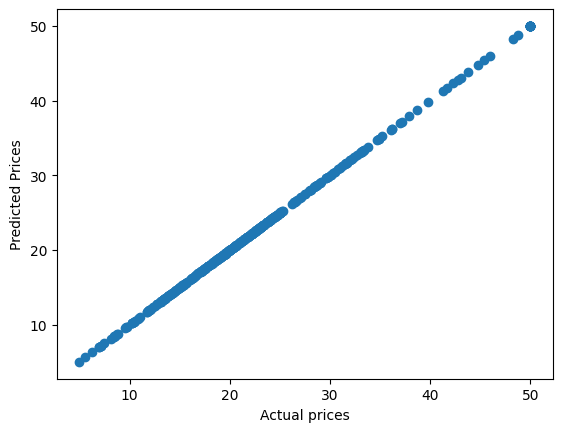

In [63]:
plt.scatter(y_train,pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.show()

In [58]:
predt=model.predict(X_test)
predt

array([19.48953  , 22.367102 , 31.239645 , 31.123005 ,  8.29822  ,
       15.3111105, 26.850895 , 27.786196 , 26.897093 , 20.761433 ,
       26.803984 , 24.089445 , 21.512041 , 22.272377 , 23.293201 ,
       22.965582 , 18.740215 , 11.122198 ,  8.928224 , 14.671697 ,
       22.164574 , 20.960184 , 34.778847 , 20.208408 , 14.129465 ,
       18.639956 , 47.259613 , 34.579082 , 33.49876  , 17.58381  ,
       16.856533 , 18.95268  , 28.92676  , 24.163067 , 11.3003235,
       17.029352 ,  7.89601  , 20.60438  , 22.121838 , 21.953669 ,
       25.926336 , 12.789507 , 28.407097 ,  7.4109716, 18.408194 ,
       14.760897 , 35.819416 , 15.051792 , 32.720535 , 12.67923  ,
       30.530575 , 30.863901 ,  6.302556 , 36.456024 , 26.171694 ,
       20.35308  , 19.201962 , 18.958578 , 16.338224 , 20.816435 ,
       18.438593 , 19.944754 , 17.998207 , 31.78242  , 31.749006 ,
       24.854916 , 49.351585 , 27.337355 , 10.469435 , 21.202263 ,
       14.146267 ,  8.188645 , 17.457514 , 16.196054 , 26.4532

In [60]:
scor1=metrics.r2_score(y_test,predt)
scor1

0.8749184856477541

In [61]:
scor2=metrics.mean_absolute_error(y_test,predt)
scor2

2.2837465819190528

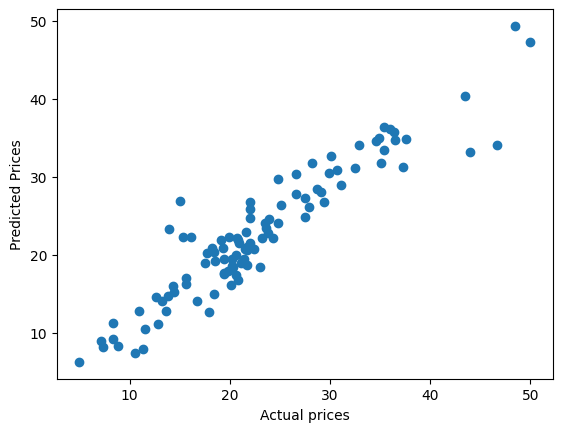

In [64]:
plt.scatter(y_test,predt)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.show()